# Домашнее задание к лекции "Визуализация данных"

Обязательная часть
Вам необходимо провести базовый EDA выбранного набора данных.
Требования к анализу:

* построить не менее 4 визуализаций различных видов;
* каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
* по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

Откуда брать данные?
Можете взять свои рабочие данные, либо найти открытые данные (например, на kaggle.com) по интересующей вас предметной области (тогда не забудьте их выложить на github вместе с ноутбуком). Если идей нет, можете взять один из перечисленных ниже:

* данные приложений из Google Play;
* данные о видео из трендов YouTube;
* данные об уровне счастья в разных странах;
* данные по фильмам и сериалам Netflix.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 16,10

In [8]:
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


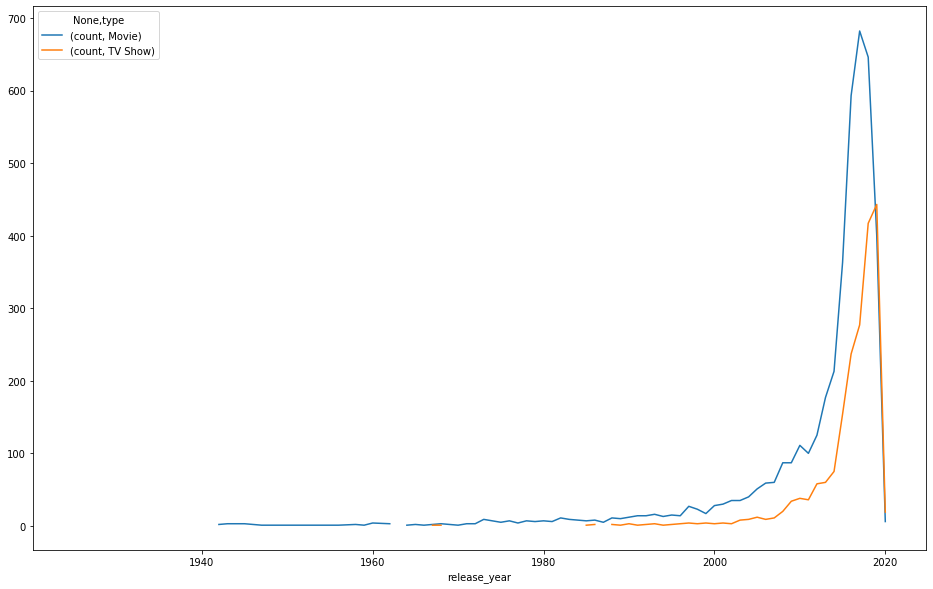

In [9]:
df.groupby(['release_year','type']).agg(['count'])['show_id'].sort_values('release_year').unstack('type').plot()

Из графиков видно, что Netflix больше фокусируется на фильмах, чем на сериалах. Бурное развите сервиса начинается с 2000х годов

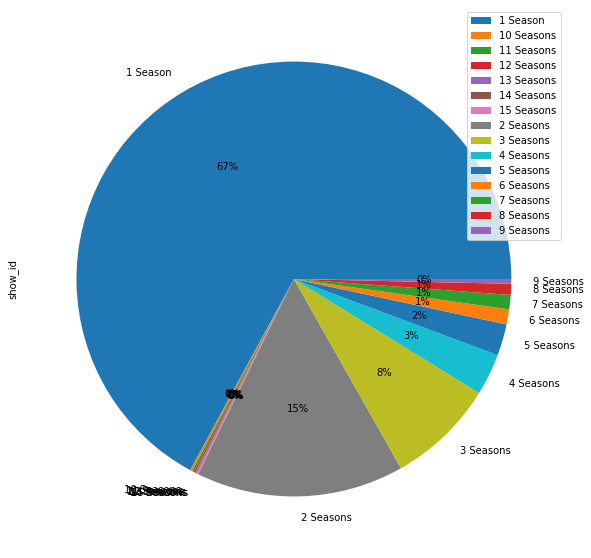

In [10]:
df.loc[df['type'] == 'TV Show'].groupby('duration').count().plot(kind='pie', y = 'show_id', autopct='%1.0f%%')

Из диаграммы видно, что на сервисе Netflix больше всего сериалов продолжительностью 1 сезон. Чем болеше сезонов, тем меньше таких сериалов на портале. От сезона к сезону интерес зрителей к сериалу ослабевает. На сервисе много неудачных сериалов, которые закрывают после первого сезона.

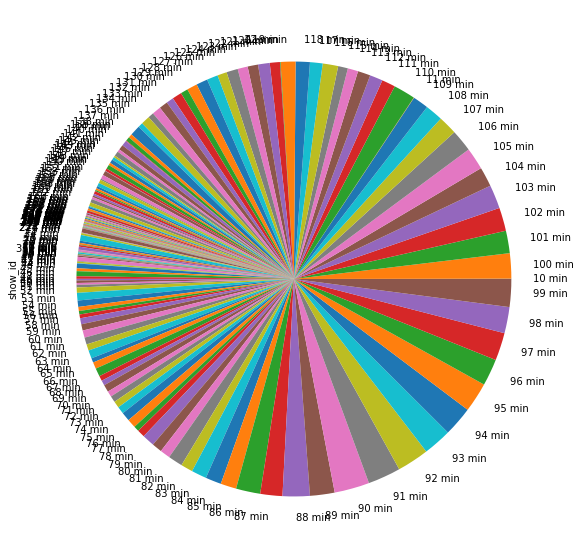

In [12]:
df.loc[df['type'] == 'Movie'].groupby('duration').count().plot(kind='pie', y='show_id', legend = False)

Фильмы по своей продолжительности распределены на сервисе Netflix примерно одинаково. 

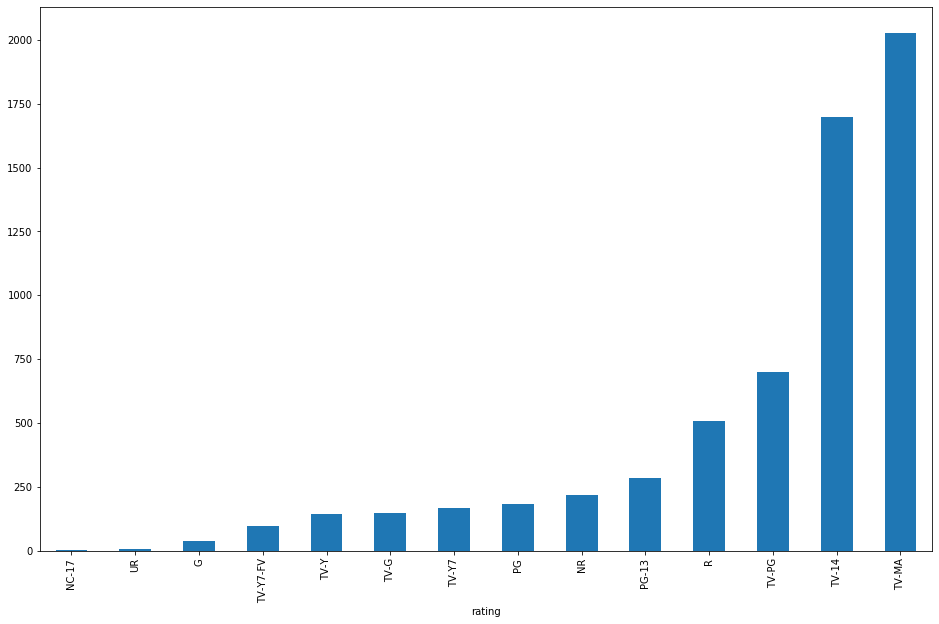

In [13]:
df.groupby('rating').count().sort_values('show_id').plot(y = 'show_id', kind='bar', legend = False)

Самые распространненные рейтинги на сервисе: TV-MA (Тип программ, предназначенный для взрослых людей и не рекомендуется детям до 17 лет.) и TV-14 (Тип программ, содержащей материалы, не подходящие для детей в возрасте до 14 лет.). Следовательно, сервис болише расчитан на платежеспособное население. 

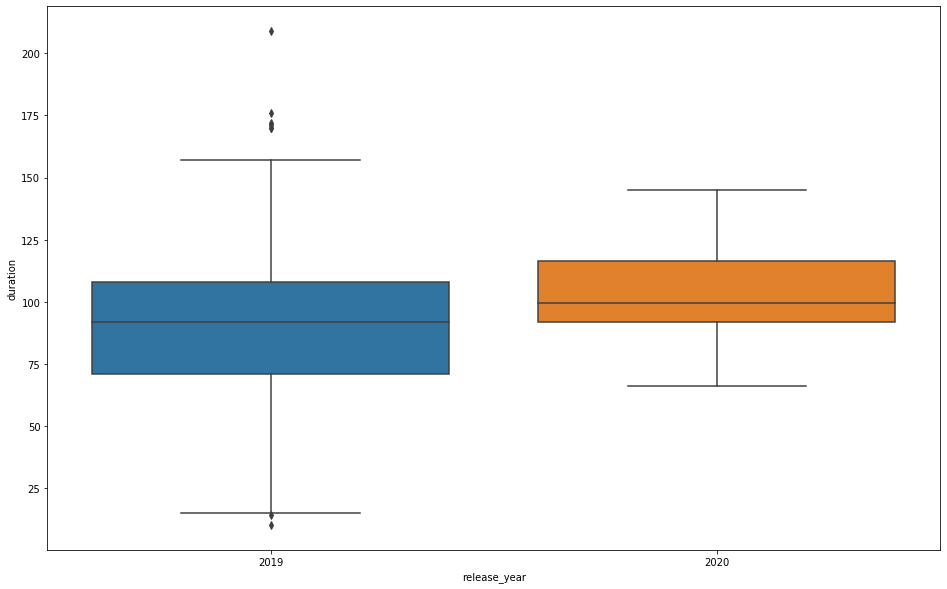

In [15]:
import seaborn as sns
release = df.loc[(df['type'] == 'Movie') & (df['release_year'] > 2018)].loc[:,['release_year', 'duration']]
release['duration'] = release['duration'].str.extract(r'(\d+)').astype('int64')
sns.boxplot(x='release_year', y= 'duration', data = release)

По сравнению с прошлым годом медиана, 25 и 75 процентили длительности фильмов увеличились (25 перцентиль этого года практически равен медиане прошлого). Интерквантильный размах и разброс распределения значений за год уменьшился. Выбросы в этом году не зафиксированы. Это может говорить о приходе к определенному стандарту длительности фильмов. 